In [1]:
import sys
import os
import pyam
myPath = os.path.dirname(os.path.abspath('CorrelationsBetweenGasesInvestigation'))
sys.path.insert(0, myPath + '/../')

import src.silicone.PlotCorrelationsBetweenGases as plotCor

<IPython.core.display.Javascript object>

In [2]:
# Inputs to the code for PlotCorrelationsBetweenGases, freely modifiable
# ________________________________________________________

years_of_interest = [2030]
save_results = '../Output/'
# if non-null, also plot these quantiles.
plot_quantiles = [0.2, 0.33, 0.5, 0.67, 0.8]
# if non-null, save data on the quantiles too
quantiles_savename = '../Output/Quantiles/'
# How many boxes are used to fit the quantiles?
quantile_boxes = 15
# Should we extend the quantile boxes by an additional factor?
quantile_decay_factor = 0.7
# Color different models different colours?
model_colours = True
# In the model-coloured version, how much does the figure need to be reduced by to leave room for the legend?
legend_fraction = 0.65
# ________________________________________________________


In [3]:
def get_sr15_scenarios(output_file):
    conn = pyam.iiasa.Connection("iamc15")
    valid_model_ids = [
        "MESSAGE*",
        "AIM*",
        "C-ROADS*",
        "GCAM*",
        "IEA*",
        "IMAGE*",
        "MERGE*",
        "POLES*",
        "REMIND*",
        # "Reference*",  # missing required columns, not sure why
        # "Shell*",  # missing required columns, not sure why
        "WITCH*"
        # "GENeSYS-MOD",  # can't download, not sure why
    ]
    variables_to_fetch = [
        "Emissions*",
    ]
    for model in valid_model_ids:
        print("Fetching data for {}".format(model))
        for variable in variables_to_fetch:
            print("Fetching {}".format(variable))
            var_df = conn.query(model=model, variable=variable, region='World')
            try:
                df.append(var_df, inplace=True)
            except NameError:
                df = pyam.IamDataFrame(var_df)

    print("Writing to {}".format(output_file))
    df.to_csv(output_file)

In [4]:
SR15_SCENARIOS = './sr15_scenarios.csv'
if not os.path.isfile(SR15_SCENARIOS):
    get_sr15_scenarios(SR15_SCENARIOS)
print('sr15 file available to load')

sr15 file available to load


In [5]:
sr15_data = pyam.IamDataFrame(SR15_SCENARIOS)
sr15_data.head()

INFO:root:Reading `./sr15_scenarios.csv`


,model,scenario,region,variable,unit,year,value
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Emissions|BC,Mt BC/yr,2005,3.4665
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Emissions|BC,Mt BC/yr,2010,3.0156
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Emissions|BC,Mt BC/yr,2015,2.8850
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Emissions|BC,Mt BC/yr,2020,2.7671
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Emissions|BC,Mt BC/yr,2025,2.1161


Finished Emissions|CO2 vs Emissions|BC in 2030
Finished Emissions|CO2 vs Emissions|CH4 in 2030
Finished Emissions|CO2 vs Emissions|CO in 2030
Finished Emissions|CO2 vs Emissions|CO2 in 2030
Finished Emissions|CO2 vs Emissions|F-Gases in 2030
Finished Emissions|CO2 vs Emissions|HFC in 2030
Finished Emissions|CO2 vs Emissions|Kyoto Gases in 2030
Finished Emissions|CO2 vs Emissions|Kyoto Gases (AR4-GWP100) in 2030
Finished Emissions|CO2 vs Emissions|Kyoto Gases (AR5-GWP100) in 2030
Finished Emissions|CO2 vs Emissions|Kyoto Gases (SAR-GWP100) in 2030
Finished Emissions|CO2 vs Emissions|N2O in 2030
Finished Emissions|CO2 vs Emissions|NH3 in 2030
Finished Emissions|CO2 vs Emissions|NOx in 2030
Finished Emissions|CO2 vs Emissions|OC in 2030
Finished Emissions|CO2 vs Emissions|PFC in 2030
Finished Emissions|CO2 vs Emissions|SF6 in 2030
Finished Emissions|CO2 vs Emissions|Sulfur in 2030
Finished Emissions|CO2 vs Emissions|VOC in 2030
                                   Emissions|CO2
variable    

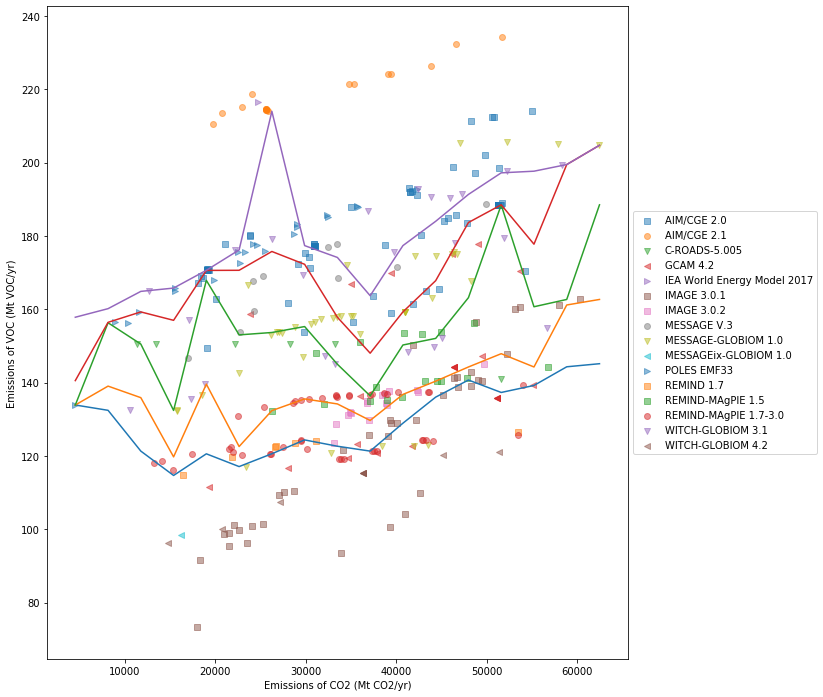

In [6]:
plotCor.plot_emission_correlations(sr15_data, years_of_interest, save_results, plot_quantiles, quantiles_savename,
                                  quantile_boxes, quantile_decay_factor, model_colours,
                                  legend_fraction)